*Stanislav Borysov [stabo@dtu.dk], DTU Management*
# Advanced Business Analytics

## Refreshing Python and Machine Learning: Part 4 - sklearn

If you are a Python programmer or you are looking for a robust library you can use to bring machine learning into a production system then a library that you will want to seriously consider is scikit-learn (also known as *sklearn*).

Scikit-learn was initially developed by David Cournapeau as a Google Summer of Code project in 2007. Later Matthieu Brucher joined the project and started to use it as apart of his thesis work. In 2010 INRIA got involved and the first public release (v0.1 beta) was published in late January 2010. The project now has more than 30 active contributors and has had paid sponsorship from INRIA, Google, Tinyclues and the Python Software Foundation.

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

- NumPy: Base n-dimensional array package
- SciPy: Fundamental library for scientific computing
- Matplotlib: Comprehensive 2D/3D plotting
- IPython: Enhanced interactive console
- Sympy: Symbolic mathematics
- Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn. The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as ease of use, code quality, collaboration, documentation and performance. Although the interface is Python, c-libraries are leverage for performance such as numpy for arrays and matrix operations, LAPACK, LibSVM and the careful use of cython.

**What are the features?**

The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data. For these features, refer to NumPy and Pandas.

Scikit Learn is focused on Machine Learning, e.g data modeling. It is not concerned with the loading, handling, manipulating, and visualizing of data. Thus, it is natural and common practice to use the above libraries, especially NumPy, for those extra steps; they are made for each other! Scikit’s robust set of algorithm offerings includes:
- Regression: Fitting linear and non-linear models
- Clustering: Unsupervised classification
- Decision Trees: Tree induction and pruning for both classification and regression tasks
- Neural Networks: End-to-end training for both classification and regression. Layers can be easily defined in a tuple
- SVMs: for learning decision boundaries
- Naive Bayes: Direct probabilistic modeling

Even beyond that, it has some very convenient and advanced functions not commonly offered by other libraries:
- Ensemble Methods: Boosting, Bagging, Random Forest, Model voting and averaging
- Feature Manipulation: Dimensionality reduction, feature selection, feature analysis
- Outlier Detection: For detecting outliers and rejecting noise
- Model selection and validation: Cross-validation, hyperparameter tuning, and metrics

**Useful links:**

- Documentation: https://scikit-learn.org/stable/documentation.html
- User giude: https://scikit-learn.org/stable/user_guide.html
- Cheat sheet (basics): https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet
- sklearn algorithm cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 1. Intro to sklearn: Linear regression and Overfitting

We'll do a linear regression exercise to review basic functionality of sklearn. We have the following data

In [1]:
import numpy as np

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(42)

n_samples = 30
sigma = 0.1

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * sigma
X_plot = np.linspace(0, 1, 100)

Let's plot it first

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

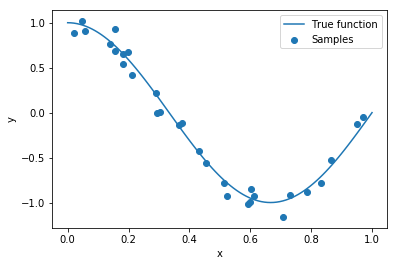

In [4]:
plt.scatter(X, y, label="Samples")
plt.plot(X_plot, true_fun(X_plot), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show();

Our task is to build a linear regression model to approximate the unknown true function from noisy samples. This is one of the most common tasks in data analysis. Let's start with a simple model $\hat{y}=\beta_0+\beta_1x$ and try to fit it based on the ordinary least squares estimation. For this one of the most common tasks in data analysis, sklearn has the following class `sklearn.linear_model.LinearRegression`. Let's fit the model and plot results.

*NOTE: When working with any package, always remember to check relevant documentation. Just google "sklearn.linear_model.LinearRegression" and the first link should be [what you are looking for](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)*

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None) 
# It's a good practice to always specify all default parameters explicitly 
# to understand what's going on and to protect ourselves from sklearn updates. 
# Here, for example, we should know that the intercept is fitted by default.
# However, we'll skip below it for the sake of brevity.

In [7]:
X = X.reshape(-1, 1) 
# Othervise, we'll get "ValueError: Expected 2D array, got 1D array instead. 
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample."
model.fit(X, y) # all the models in sklearn have this method

/Users/borysov/py3/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Let's define a function to plot modeling results, which we can reuse in the future
def plot_results(X_samples, y_samples, X_plot, y_true_plot, y_pred_plot):
    plt.scatter(X_samples, y_samples, label="Samples")
    plt.plot(X_plot, y_true_plot, label="True function")
    plt.plot(X_plot, y_pred_plot, c='r', label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.show()

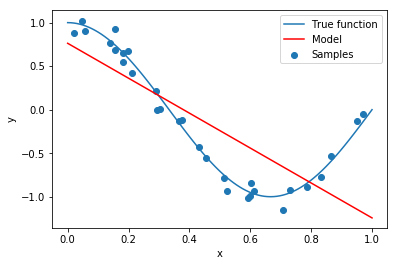

In [9]:
X_plot = X_plot.reshape(-1, 1)
y_true_plot = true_fun(X_plot)
y_pred_plot = model.predict(X_plot)
plot_results(X, y, X_plot, y_true_plot, y_pred_plot)

All the models in sklearn provide `score` method to measure "goodness of fit". The default value returned depends on the task. For regression, it's $R^2$ and accuracy is used for classification.

In [10]:
model.score(X, y) # R^2 is used by default

0.6209875421648398

Root mean squared error is another popular measure

In [11]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2))
# alternatively, np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred)) can be used

In [12]:
y_pred = model.predict(X)
RMSE(y, y_pred)

0.43521641536117767

*Sidenote: Check Appendix of this notebook for the explanation of a few popular metrics for regression and classification. The most popular metrics are implemented in the `sklearn.metrics` module. Check the documentation [here](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)*

OK, we have calculated these numbers for our model. Are they high or low? To answer this question, we need to have a reference point (a.k.a. a baseline model). For regression, the most "naive" baseline is the mean prediction. Even for such a trivial task, the related functionality is already implemented in `sklearn.dummy.DummyRegressor`. There's also `sklearn.dummy.DummyClassifier` class which can be used for naive classification baselines, for example, predicting the most frequent class.

In [13]:
from sklearn.dummy import DummyRegressor

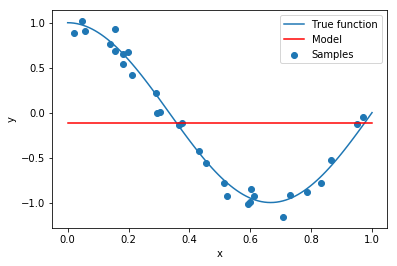

In [14]:
model = DummyRegressor(strategy='mean', constant=None, quantile=None)
# 
model.fit(X, y)
y_pred_plot = model.predict(X_plot)
plot_results(X, y, X_plot, y_true_plot, y_pred_plot)

Let's check the baseline scores

In [15]:
y_pred = model.predict(X)
print("Baseline R2:", model.score(X, y))
print("Baseline RMSE:", RMSE(y, y_pred))

Baseline R2: 0.0
Baseline RMSE: 0.706933439179119


Good, it seems that our linear model performs better than the baseline. Let's try to use some data transformations to enrich our features. Remember that the word "linear" refers to the linearity of a model w.r.t. its parameters, not the features (independent variables $x_n$). The most common transformations include power, exp, and log. Here, we will use the power transformation to build a polynomial regression model $\hat{y}=\sum_{n=0}^{N}\beta_nx^{n}$. Let's try a quadratic model ($N=2$) first.

In [16]:
X2 = X ** 2
X_ext = np.concatenate((X, X2), axis=1)
X_ext.shape

(30, 2)

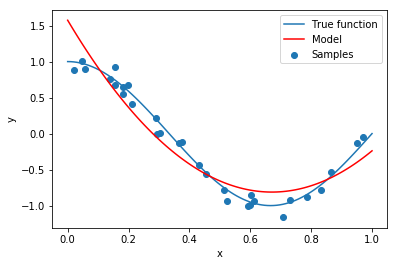

Model R2: 0.9056541191707004
Model RMSE: 0.2171400816369348


In [17]:
model = LinearRegression()
model.fit(X_ext, y)
#
X_ext_plot = np.concatenate((X_plot, X_plot ** 2), axis=1)
y_pred_plot = model.predict(X_ext_plot)
plot_results(X, y, X_plot, y_true_plot, y_pred_plot)
y_pred = model.predict(X_ext)
#
print("Model R2:", model.score(X_ext, y))
print("Model RMSE:", RMSE(y, y_pred))

Looks good! Let's try to add even more features by increasing the degree of our polynomial model. Unsurprisingly, there is a function in `sklearn` to get the power-transformed features.

*Sidenote: It might be a good idea to skim all the methods implemented in the basic sklearn modules: https://scikit-learn.org/stable/modules/classes.html*

In [18]:
from sklearn.preprocessing import PolynomialFeatures

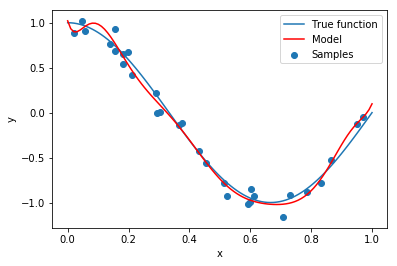

Model R2: 0.9879206576881783
Model RMSE: 0.07769626990575722


In [19]:
# Default settings: sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order=’C’)
# We don't need to include bias (0 power) as it's already defined in the linear model
poly = PolynomialFeatures(degree=10, include_bias=False)
X_ext = poly.fit_transform(X)
# We don't actually fit anything here but fitting is required when a data transformer used for the first time
# other examples include scalers, normalizers or any other preprocessing tasks
model = LinearRegression()
model.fit(X_ext, y)
X_ext_plot = poly.transform(X_plot) 
# For the prediction, we don't need to fit anything
y_pred_plot = model.predict(X_ext_plot)
plot_results(X, y, X_plot, y_true_plot, y_pred_plot)
y_pred = model.predict(X_ext)
#
print("Model R2:", model.score(X_ext, y))
print("Model RMSE:", RMSE(y, y_pred))

According to the goodness of fit, it looks even better! Let's plot the RMSE for the polynomials of different degrees.

In [20]:
errors = []
degrees = range(1, 25)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_ext = poly.fit_transform(X) 
    model = LinearRegression()
    model.fit(X_ext, y)
    y_pred = model.predict(X_ext)
    errors.append(RMSE(y, y_pred))

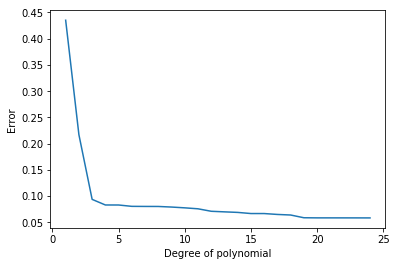

In [21]:
plt.plot(degrees, errors)
plt.xlabel("Degree of polynomial")
plt.ylabel("Error")
plt.show();

The error decreases with the number of features. However, will this model be able to *generalize*, i.e., make reliable predictions for new (unseen) data? Let's compare the performance of two polynomial models of 2nd and 20th degrees for new data generated in the same way as the original data.

In [22]:
X_new = np.sort(np.random.rand(n_samples)).reshape(-1, 1)
y_new = true_fun(X_new) + np.random.randn(n_samples) * sigma

We can define a function for convenience

In [23]:
def get_polynomial_model_RMSE(X, y, X_new, y_new, degree=1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_ext = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_ext, y)
    X_new_ext = poly.transform(X_new)
    y_pred = model.predict(X_new_ext)
    return RMSE(y_new, y_pred)

In [24]:
print("Model 2 RMSE:", get_polynomial_model_RMSE(X, y, X_new, y_new, 2))
print("Model 20 RMSE:", get_polynomial_model_RMSE(X, y, X_new, y_new, 20))

Model 2 RMSE: 1.026812049237873
Model 20 RMSE: 4.233978411416745


Oops, the model with 20 features performs much worse. This is a classic example of overfitting. A usual way to address this problem is to use two separate datasets for training and testing a model. We can use `sklearn.model_selection.train_test_split` for this.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
test_size = 0.33 # 33% of the data will be used for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
#X_train, X_test, y_train, y_test

Let's now plot the performance of different models on the training and test sets...

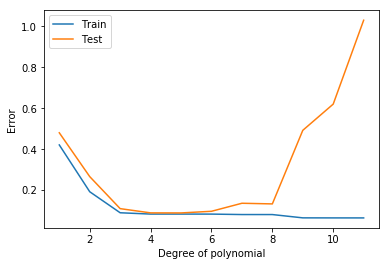

In [27]:
errors_train, errors_test = [], []
degrees = range(1, 12)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_ext_train = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_ext_train, y_train)
    y_pred_train = model.predict(X_ext_train)
    errors_train.append(RMSE(y_train, y_pred_train))
    X_ext_test = poly.transform(X_test) # never use fit or fit_transform on the test set!
    y_pred_test = model.predict(X_ext_test)
    errors_test.append(RMSE(y_test, y_pred_test))
#
plt.plot(degrees, errors_train, label="Train")
plt.plot(degrees, errors_test, label="Test")
plt.xlabel("Degree of polynomial")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()

...and find the model which performs the best on the test set

In [28]:
print("Best degree:", degrees[np.argmin(errors_test)])

Best degree: 5


A straightforward extension of this split is cross-validation (CV). The most basic CV is a K-fold CV, where the dataset is divided into $K$ chunks ("folds"). All but one folds are used for training and the remaining one is used for testing. So the training/test procedure is repeated $K$ times and the evaluation metrics can be averaged over the folds. CV is a more time-consuming procedure but it gives more statistically reliable performance estimation. It is implemented in `sklearn.model_selection.KFold`. For other CV types, check [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

*Sidenote: Two other important things to know about the train/test splits (and cross-validation) are shuffling and stratification:*
- *never shuffle data which is correlated (not i.i.d.) such as time series or spatial data;*
- *make sure that the distribution of the train and test data is the same. This is particularly relevant for the classification problems where class distribution can be preserved using stratified CV implemented in `sklearn.model_selection.StratifiedKFold`*

In [29]:
from sklearn.model_selection import KFold

In [30]:
n_splits = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42) # the data is not shuffled by default
scores_cv = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train) # linear model
    y_pred = model.predict(X_test)
    scores_cv.append(RMSE(y_test, y_pred))
print(np.mean(scores_cv))

0.4611982039679111


If calculating the CV performance metrics is our only goal, we can directly use `sklearn.model_selection.cross_val_score`. This function takes the model, data, scoring function, and CV split. As we want to use RMSE and not the standard scorer, we need to implement this function ourself. **Note, that the score should be higher for a better model in contrast to an error.**

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
def RMSE_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return -RMSE(y, y_pred) # one of the ways to do it. Another way is 1 / RMSE. Etc

In [33]:
model = LinearRegression()
#
poly = PolynomialFeatures(degree=1, include_bias=False)
X_ext = poly.fit_transform(X)
print("Model 1 mean cv RMSE:", -cross_val_score(model, X_ext, y, scoring=RMSE_scorer, cv=kf).mean())
#
poly = PolynomialFeatures(degree=2, include_bias=False)
X_ext = poly.fit_transform(X)
print("Model 2 mean cv RMSE:", -cross_val_score(model, X_ext, y, scoring=RMSE_scorer, cv=kf).mean())
#
poly = PolynomialFeatures(degree=10, include_bias=False)
X_ext = poly.fit_transform(X)
print("Model 10 mean cv RMSE:", -cross_val_score(model, X_ext, y, scoring=RMSE_scorer, cv=kf).mean())

Model 1 mean cv RMSE: 0.4611982039679111
Model 2 mean cv RMSE: 0.24458874628633342
Model 10 mean cv RMSE: 0.3108022144185042


Here, the degree of a polynomial model is not fitted during the model's training and should be defined beforehand (a priori). Such parameters, known as *hyperparameters*, usually define model complexity. Another way to penalize model complexity is regularisation, which corresponds to penalizing the norm of the model's parameters (i.e., forcing many of them to be close to zero). For example, lasso regression (`sklearn.linear_model.Lasso`) is a linear regression where, along with the regular OLS minimization objective, the sum of absolute values (L1-norm) of the regression coefficients is minimized. Ridge regression (`sklearn.linear_model.Ridge`) is another popular model where the sum of squares (L2-norm) of the parameters is penalized. However, these type of models usually has another hyperparameter which defines regularization strength. Let's calculate the CV score of lasso regression for the polynomial of the 10th degree.

In [34]:
from sklearn.linear_model import Lasso

In [35]:
model = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, 
              max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=42)
# alpha defines regularization strength
poly = PolynomialFeatures(degree=10, include_bias=False)
X_ext = poly.fit_transform(X)
print("Model Lasso mean CV RMSE:", -cross_val_score(model, X_ext, y, scoring=RMSE_scorer, cv=kf).mean())

Model Lasso mean CV RMSE: 0.7279374400944564


Pretty bad score. Let's try to tune (i.e., find the best value) `alpha` using CV. As it's a very common task, there's a function for this purpose called `sklearn.model_selection.GridSearchCV`. **Note, that the best values of the hyperparameters are selected using the score maximization.**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
estimator = Lasso()
parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2]
} # a set of values for hyperparameters to tune
model = GridSearchCV(estimator, parameters) 
# scoring and cv are optional, and it's usually ok to use the defaults
model.fit(X_ext, y)
#
print("best_estimator_:", model.best_estimator_)
print("Mean cross-validated score of the best_estimator:", -model.best_score_)

best_estimator_: Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean cross-validated score of the best_estimator: 0.28083166991900765


/Users/borysov/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/borysov/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009067697743823946, tolerance: 0.0003516023999796361
  positive)
/Users/borysov/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02431725015545888, tolerance: 0.001231973473935392
  positive)
/Users/borysov/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

Using `GridSearchCV`, we found a much better value for `alpha`. Let's plot the results for the best lasso model

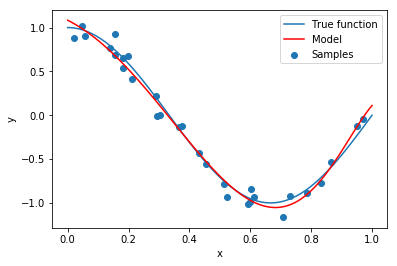

In [38]:
X_ext_plot = poly.transform(X_plot) 
y_pred_plot = model.predict(X_ext_plot)
plot_results(X, y, X_plot, y_true_plot, y_pred_plot)

We can also compare the lasso coefficients to the coefficients of the original polynomial model of the 10th degree

In [39]:
model.best_estimator_.coef_

array([-1.73915592, -5.95310379,  2.09006102,  4.1376587 ,  1.91958144,
        0.10970259,  0.        , -0.        , -0.        , -1.53683631])

In [40]:
X_ext_train = poly.fit_transform(X_train)
model_poly10 = LinearRegression()
model_poly10.fit(X_ext_train, y_train)
model_poly10.coef_

array([-9.85894668e+00,  3.19910562e+02, -3.88110942e+03,  2.28352837e+04,
       -7.78353215e+04,  1.64114159e+05, -2.17272743e+05,  1.75859263e+05,
       -7.95095670e+04,  1.53790475e+04])

*NOTE: In this exercise, we used all the data for the hyperparameter tuning. A better way is to tune hyperparameters on the training set only (for example, using CV or train/validation split of the training set). The final performance of different models is estimated on the test set which has not been seen by any model (or nested CV can be used).*

### Pipelines

As you probably have noticed, we need to run `PolynomialFeatures` transformation every time we use the model. To simplify this, we can use `sklearn.pipeline` which defines a sequance of actions (implementing fit/transform) to be applied to the data. The last step should be an estimator.

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_regression", LinearRegression())
])

The pipeline can be used just like a regular model. When the pipeline's method `fit` is called, all the specified steps use the `fit_transform` method before calling the estimator's `fit`. When the pipeline's method `predict` is called, all the specified steps use the `transform` method before calling the estimator's `predict` (as nothing should be fitted during the prediction).

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# etc...

In [44]:
-cross_val_score(model, X, y, scoring=RMSE_scorer, cv=kf).mean()

0.3108022144185042

The hyperparameters of the pipeline steps can be also tuned. To access them, the double underscore '__' should be used

In [45]:
parameters = {
    'polynomial_features__degree': range(1, 10)
} # hyperparameters grid for the model to try
model_tuned = GridSearchCV(model, parameters, scoring=RMSE_scorer, cv=kf) 
# scoring and cv are optional, the default values are usually ok
model_tuned.fit(X, y)
print("best_estimator_:", model_tuned.best_estimator_)
print("Mean cross-validated score of the best_estimator:", -model_tuned.best_score_)

best_estimator_: Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Mean cross-validated score of the best_estimator: 0.08937913840850605


### Data scaling

Another common step in machine learning is data normalization. For example, it might be beneficial to have the input features scaled to zero mean and unit variance. For this purpose, `sklearn.preprocessing.StandardScaler` can be used.

In [46]:
# feature scaling
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
#
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
# which is equivalent to
#X_train = scaler_X.fit_transform(X_train)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)) # 1D arrays are not supported :(
#
X_test = scaler_X.transform(X_test) # never fit anything to the test set!
# fitting the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Scaling back
y_pred = scaler_y.inverse_transform(y_pred)
RMSE(y_test, y_pred)

0.7637388446462889

It is convenient to define scaling as a step in a pipeline

In [47]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_regression", LinearRegression())
])
# etc...

## 2. A few other examples

In this section, a few sklearn examples are provided for you to take a brief look. You're not supposed to memorize them. Check more examples here https://scikit-learn.org/stable/auto_examples/index.html

### 2.1. Logistic regression

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

`class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`

**Note that L2-regularization is applied by default, where C defines the inverse regularization strength (~1/alpha)!**

#### 2.1.1. Logistic regression: Nice tutorial

**Building A Logistic Regression in Python, Step by Step** 
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#### 2.1.2. Logistic regression: Binary classification problem

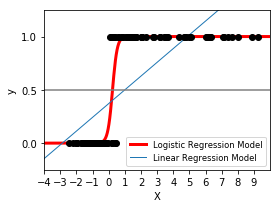

In [48]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

#### 2.1.3. Logistic regression: Multiclass classification problem

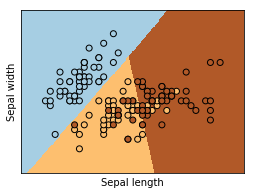

In [49]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### 2.2. Classifiers

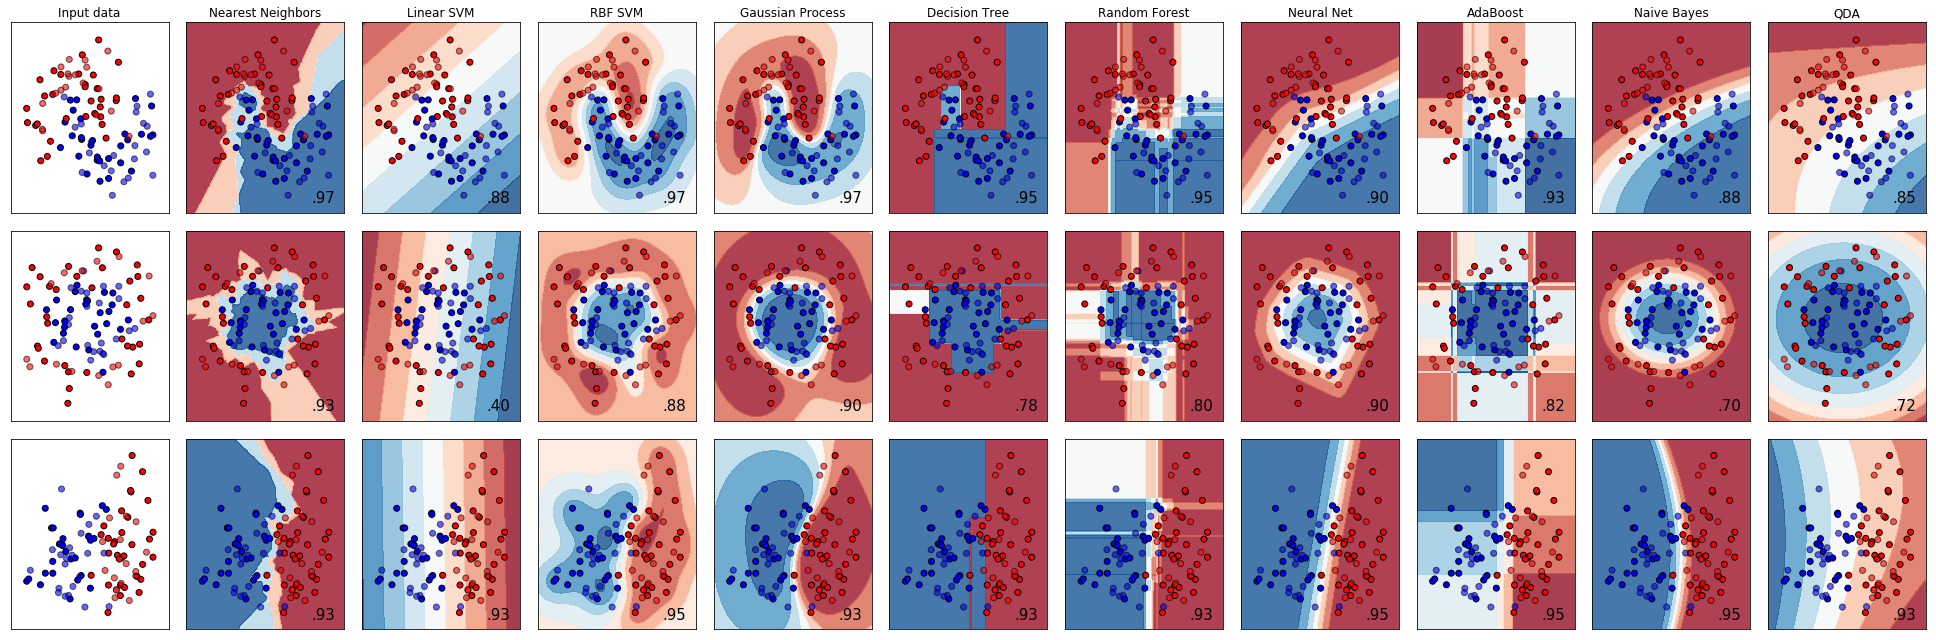

In [50]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### 2.3. Principal component analysis

[0.72408528 0.27427885 0.00163586]
[0.72408528 0.27427885 0.00163586]


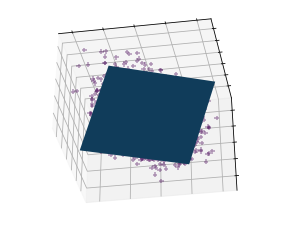

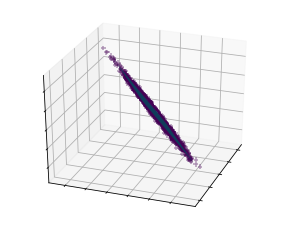

In [51]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html

# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    print(pca_score)
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

### 2.4. Clustering

#### 2.4.1 K-Means tutorial

**K-Means Clustering with scikit-learn**
https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

#### 2.4.2. Another example

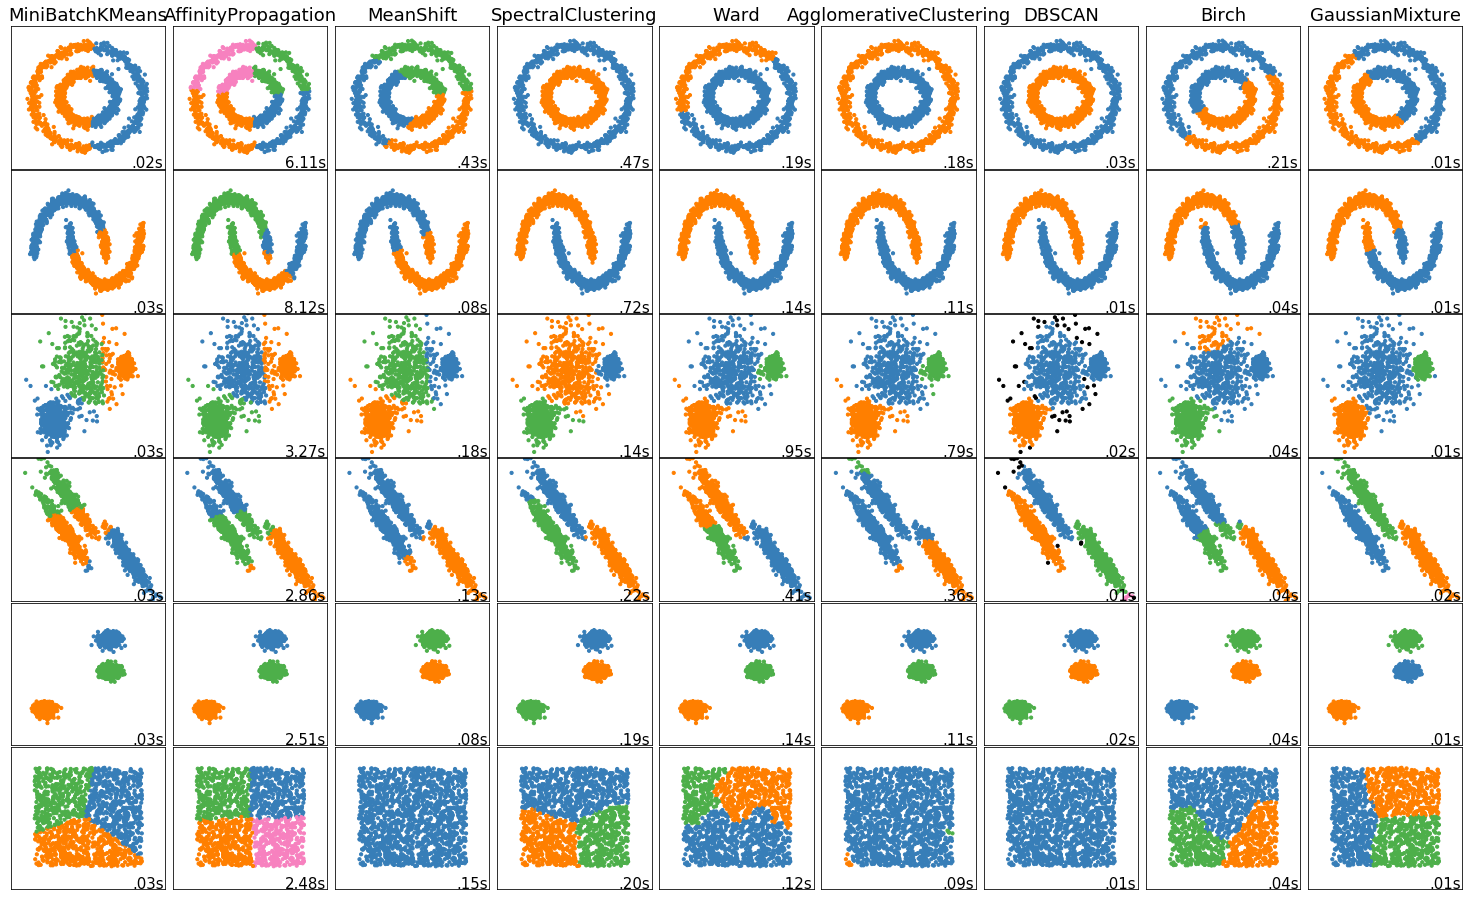

In [52]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## 3. Appendix: Goodness of fit measures

### 3.1. Appendix: Goodness of fit measures - Regression

*sklearn goodness of fit measures for regression (click on measures to see examples): https://scikit-learn.org/stable/modules/classes.html#regression-metrics*

The new model that we may choose to formulate should be compared with the current one, not only by observing a predictedVSobserved plot, but also by using the goodness-of-fit measures. They typically summarize the discrepancy between observed values and the values expected under the model in question. Their main categories are presented below:


* **Error measures in the estimation period:** root mean squared error, mean absolute error, mean absolute percentage error, mean absolute scaled error, mean error, mean percentage error
* **Error measures in the validation period** (if you have done out-of-sample testing)
* **Residual diagnostics and goodness-of-fit tests:** plots of actual and predicted values; plots of residuals versus time, versus predicted values, and versus other variables; residual autocorrelation plots, cross-correlation plots, and tests for normally distributed errors; measures of extreme or influential observations; tests for excessive runs, changes in mean, or changes in variance etc.

In the current notebook, we will focus on the first category.

If there is any one statistic that normally takes precedence over the others, it is the **root mean squared error (RMSE)**, which is the square root of the mean squared error. This is the statistic whose value is minimized during the parameter estimation process, and it is the statistic that determines the width of the confidence intervals for predictions.

$RMSE = \sqrt{\frac{\sum_{t=1}^{n}(\hat{y_{t}}-y_{t})^2}{n}} $

where $\hat{y_{t}}$ is the predicted or estimated value and $y_{t}$ is the regression's actual observation. Finally the n represents the number of non-missing data points.

The function that calculates the RMSE is:

For a datum which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that small anymore. However, although the smaller the RMSE, the better, you can make theoretical claims on levels of the RMSE by knowing what is expected from your dependent variable in your field of research. Keep in mind that you can always normalize the RMSE.

The **mean absolute error (MAE)** is also measured in the same units as the data, and is usually similar in magnitude to, but slightly smaller than, the root mean squared error.  It is less sensitive to the occasional very large error because it does not square the errors in the calculation. It is the average vertical distance between each point and the Y=X line, which is also known as the One-to-One line.

$$ MAE = \frac{\sum_{t=1}^{n}\left |\hat{y_{t}}-y_{t}\right |}{n}$$

where $\hat{y_{t}}$ is the predicted or estimated value and $y_{t}$ is the regression's actual observations.

The **mean absolute percentage error (MAPE)** is also often useful for purposes of reporting, because it is expressed in generic percentage terms which will make some kind of sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold. The MAPE can only be computed with respect to data that are guaranteed to be strictly positive, so if this statistic is missing from your output where you would normally expect to see it, it’s possible that it has been **suppressed due to negative data values**.

$$MAPE = \frac{100}{N}\times \sum_{t=1}^{n}\left |\frac{y_{t}-\hat{y_{t}}}{y_{t}} \right |$$

As you can see in our example, it cannot be used if there are zero values (which sometimes happens for example in demand data) because there would be a division by zero.

**R-squared** is the “percent of variance explained” by the model.  That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable.  (The latter number would be the error variance for a constant-only model, which merely predicts that every observation will equal the sample mean.)  It is called R-squared because in a simple regression model it is just the square of the correlation between the dependent and independent variables, which is commonly denoted by “r”. 

If $\bar{y}$ is the mean of the observed data:

$$ \bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i $$

then the variability of the data set can be measured using the following **sum of squares** formulas:

* The total sum of squares (proportional to the variable of the data):

$$ SS_{tot} = \sum_{i}^{ }(y_i-\bar{y})^2 $$

* The sum of squares of residuals, also called the residual sum of squares:

$$ SS_{res} = \sum_{i}^{ }(y_i-\hat{y})^2 $$

And the general definition of the coefficient of determination is:

$$ R^2 \equiv 1 - \frac{SS_{res}}{SS_{tot}} $$

An **R-squared** of 1 indicates that the regression line perfectly fits the data.

The use of an **adjusted R-squared** is an attempt to take account of the phenomenon of the **R-squared** automatically and spuriously increasing when extra explanatory variables are added to the model. It is a modification due to Henri Theil of **R-squared** that adjusts for the number of explanatory terms in a model relative to the number of data points. The **adjusted R-squared** can be negative, and its value will always be less than or equal to that of **R-squared**. 

$$\bar{R}^2 = R^2 - (1 - R^2)\frac{n-1}{n-p-1}$$

where $p$ is the total number of explanatory variables in the model (not including the constant term), and $n$ is the sample size.

Last but not least, the **Pearson’s correlation coefficient** is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

The formula for $\rho$ is:

$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma _X\sigma _Y}$$

where:

* $cov$ is the covarianve
* $\sigma _{X}$ is the standard deviation of X
* $\sigma_Y$  is the standard deviation of Y

The Pearson’s correlation coefficient can be calculated using the **scipy** package:

or the **numpy** package:

So, now you can create a function that calculates all this goodness of fit measures, and reuse is as often as you want!

### 3.2. Appendix: Goodness of fit measures - Classification

*sklearn goodness of fit measures for classification (click on measures to see examples): https://scikit-learn.org/stable/modules/classes.html#classification-metrics*

A classification model like Logistic Regression will output a probability number between 0 and 1 instead of the desired output of actual target variable like Yes/No, etc. The next logical step is to translate this probability number into the target/dependent variable in the model and test the accuracy of the model. To understand the implication of translating the probability number, let’s understand few basic concepts relating to evaluating a classification model with the help of an example given below.

**Goal:** Create a classification model that predicts fraud transactions

**Output:** Transactions that are predicted to be Fraud and Non-Fraud

**Testing:** Comparing the predicted result with the actual results

**Dataset:** Number of Observations: 1 million; Fraud : 100; Non-Fraud: 999,900


Assuming you were able to translate the output of your model to Fraud/Non-Fraud, the predicted result could be compared to actual result and summarized as follows:

a) **True Positives (TP):** Observations where the actual and predicted transactions were fraud
 
b) **True Negatives (TN):** Observations where the actual and predicted transactions weren’t fraud

c) **False Positives (FP):** Observations where the actual transactions weren’t fraud but predicted to be fraud

d) **False Negatives (FN):** Observations where the actual transactions were fraud but weren’t predicted to be fraud

From the class notebook, you have already learnt the **Confusion Matrix**, which is a very popular way to represent the summarized findings:


<img src="ConfusionMatrix.png" style="max-width:100%; width: 40%">

#### Sensitivity, Specificity, Precision

The performance of our classification function is also evaluated using the statistical measures **sensitivity**, **specificity** and **precision**.

* **Sensitivity, recall, hit rate, or true positive rate (TPR)** measures the proportion of positives that are correctly identified as such.

Sensitivity = No. of True Positives / (No. of True Positives + No. of False Negatives)

$$ Sensitivity (TPR)= \frac{TP}{(TP + FN)} $$

* **Specificity or true negative rate (TNR)** measures the proportion of negatives that are correctly identified as such.

Specificity = No. of True Negatives / (No. of True Negatives + No. of False Positives)

$$ Specificity (TNR)= \frac{TN}{(TN + FP)}  $$

* **Precision or positive predictive value (PPV)** is calculated as:

Precision = No. of True Positives / (No. of True Positives + No. of False Positives)

$$ Precision (PPV) = \frac{TP}{(TP + FP)} $$

*Since the formula does not contain FN and TN, Precision may give you a biased result, especially for imbalanced classes.*



#### F-measure and Kappa

A measure that combines precision and recall is the harmonic mean of precision and recall, the traditional **F-measure or balanced F-score**:

$$ F = 2 \cdot \frac{precision\cdot recall}{precision + recall} $$

$$ F = 2 \cdot \frac{PPV\cdot TPR}{PPV + TPR} $$

This measure is approximately the average of the two when they are close, and is more generally the harmonic mean, which, for the case of two numbers, coincides with the square of the geometric mean divided by the arithmetic mean. 

The **Kappa statistic (or value)** is a metric that compares an Observed Accuracy with an Expected Accuracy (random chance). The kappa statistic is used not only to evaluate a single classifier, but also to evaluate classifiers amongst themselves. In addition, it takes into account random chance (agreement with a random classifier), which generally means it is less misleading than simply using accuracy as a metric (an Observed Accuracy of 80% is a lot less impressive with an Expected Accuracy of 75% versus an Expected Accuracy of 50%). Computation of Observed Accuracy and Expected Accuracy is integral to comprehension of the kappa statistic, and is most easily illustrated through use of a confusion matrix. 

Lets begin with a simple confusion matrix from a simple binary classification of Cats and Dogs:

$$\begin{vmatrix}
  & Cats  & Dogs \\ 
Cats & 10 & 7\\ 
 Dogs & 5  & 8
\end{vmatrix}$$

From the confusion matrix we can see there are 30 instances total $(10 + 7 + 5 + 8 = 30)$. The **observed accuracy** of our classifier is the number of instances that were classified correctly throughout the entire confusion matrix. For this confusion matrix, this would be $0.6 ((10 + 8) / 30 = 0.6)$. 

Before we get to the equation for the kappa statistic, one more value is needed: the **Expected Accuracy.** This value is defined as the accuracy that any random classifier would be expected to achieve based on the confusion matrix. The Expected Accuracy is directly related to the number of instances of each class (Cats and Dogs), along with the number of instances that the machine learning classifier agreed with the ground truth label. 

To calculate Expected Accuracy for our confusion matrix, first multiply the marginal frequency of Cats for one "rater" by the marginal frequency of Cats for the second "rater", and divide by the total number of instances. The marginal frequency for a certain class by a certain "rater" is just the sum of all instances the "rater" indicated were that class. In our case, $15 (10 + 5 = 15)$ instances were labeled as Cats according to *ground truth*, and $17 (10 + 7 = 17)$ instances were classified as Cats by the machine learning classifier. This results in a value of $8.5 (15 * 17 / 30 = 8.5)$. 
This is then done for the second class as well (and can be repeated for each additional class if there are more than 2). $15 (10 + 5 = 15)$ instances were labeled as Dogs according to ground truth, and $13 (10 + 7 = 17) $instances were classified as Dogs by the machine learning classifier. This results in a value of $6.5 (15 * 13 / 30 = 6.5)$. The final step is to add all these values together, and finally divide again by the total number of instances, resulting in an **Expected Accuracy** of $0.5 ((8.5 + 6.5) / 30 = 0.5)$. 

In our example, the Expected Accuracy turned out to be 50%, as will always be the case when either "rater" classifies each class with the same frequency in a binary classification (both Cats and Dogs contained 15 instances according to ground truth labels in our confusion matrix).

The kappa statistic can then be calculated using both the **Observed Accuracy** (0.60) and the **Expected Accuracy** (0.50) and the formula:

$$ Kappa = \frac{ObservedAccuracy - ExpectedAccuracy}{1 - ExpectedAccuracy} =  \frac{0.60 - 0.50}{1 - 0.50} = 0.20$$

There is not a standardized interpretation of the kappa statistic. According to Wikipedia (citing their paper), Landis and Koch considers 0-0.20 as slight, 0.21-0.40 as fair, 0.41-0.60 as moderate, 0.61-0.80 as substantial, and 0.81-1 as almost perfect. Fleiss considers kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.